# Определение перспективного тарифа компании "Мегалайн"

В данном проекте будут проведены иследования двух тарифных планов "Смарт" и "Ультра"

**Цель иследования** - выявить тариф который приносит больше денег компании "Мегалайн"

**Описание тарифов**
Тариф "Смарт":
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф "Ультра":
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Имеющиеся данные** - Небольшая выборка клиентов. Данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**План иследования:**
1. Знакомство с данными
2. Предобработка данных
3. Анализ данных
4. Формулировка и проверка гипотез
5. Вывод

**Импорт необходимых для проекта библиотек**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:.2f}'.format)

## Знакомство с данными

Открываем файлы

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')


Изучим данные

In [3]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [5]:
calls.duplicated().sum()

0

In [6]:
calls.describe()

,duration,user_id
count,202607.00,202607.00
mean,6.76,1253.94
std,5.84,144.72
min,0.00,1000.00
25%,1.30,1126.00
50%,6.00,1260.00
75%,10.70,1379.00
max,38.00,1499.00


In [7]:
len(calls['user_id'].unique())

492

**В данных calls:** 
1. Отсутсвуют пропуски и дубликаты, нет ошибок в названии столбцов
2. Необхотимо перевести call_date в формат datetime64
3. По количеству уникальных данных в user_id, можно предположить что не все пользователи делали звонки.

In [8]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [10]:
internet.duplicated().sum()

0

In [11]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.00,149396.00,149396.00
mean,74697.50,370.19,1252.10
std,43127.05,278.30,144.05
min,0.00,0.00,1000.00
25%,37348.75,138.19,1130.00
50%,74697.50,348.01,1251.00
75%,112046.25,559.55,1380.00
max,149395.00,1724.83,1499.00


In [12]:
len(internet['user_id'].unique())

497

**В данных internet:**
1. Отсутсвуют пропуски и дубликаты
2. Необхотимо перевести session_date в формат datetime64
3. Присутствует столбец Unnamed: 0 дублирующий индексы.
4. По количеству уникальных данных в user_id, можно предположить что не все пользователи пользовались услугами интернета.

In [13]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
messages.describe()

,user_id
count,123036.00
mean,1256.99
std,143.52
min,1000.00
25%,1134.00
50%,1271.00
75%,1381.00
max,1499.00


In [15]:
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [16]:
messages.duplicated().sum()

0

In [17]:
len(messages['user_id'].unique())

426

**В данных messages:**
1. Отсутсвуют пропуски и дубликаты, нет ошибок в названии столбцов
2. Необхотимо перевести message_date в формат datetime64
3. По количеству уникальных данных в user_id, можно предположить что не все пользователи пользовались услугами сообщений.

In [18]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**В данных tariffs:**
1. Отсутсвуют пропуски и дубликаты

In [19]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [20]:
users[users['churn_date'].notna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [21]:
users.describe()

,user_id,age
count,500.00,500.00
mean,1249.50,46.59
std,144.48,16.67
min,1000.00,18.00
25%,1124.75,32.00
50%,1249.50,46.00
75%,1374.25,62.00
max,1499.00,75.00


In [22]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [23]:
users.duplicated().sum()

0

smart    351
ultra    149
Name: tariff, dtype: int64

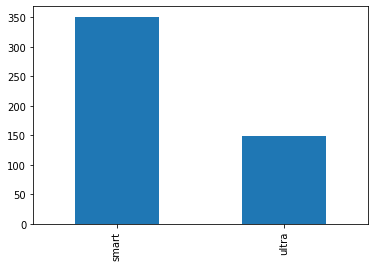

In [24]:
users['tariff'].value_counts().plot(kind='bar')
users['tariff'].value_counts()

Проверим есть ли совпадающие пользователи под разным user_id

In [25]:
users[['city', 'first_name', 'last_name']].duplicated().sum()

0

In [26]:
len(users['user_id'].unique())

500

**В данных users:**
1. Отсутсвуют явные дубликаты
2. Есть пропуски в churn_date, но это означает что тариф еще действует
3. Необхотимо перевести churn_date и reg_date в формат datetime64
4. Количество пользователей тарифа smart в 2.35 раз превышает количества пользователей тарифа ultra

### Вывод

Ознакомившись с данными:
1. Во всех данных данны с датой необходимо перевести в формат datetime64
2. В каждой категории услуг уникальное значение user_id находится в диапозоне от 1000 до 1499, так же как в данных с пользователями, но количество уникальных значений user_id в данных с услугами меньше 500, возможно не все пользователи пользовались той или иной услугой.
3. В internet присутствует столбец Unnamed: 0 дублирующий индексы.
4. Количество пользователей тарифа smart в 2.35 раз превышает количества пользователей тарифа ultra

## Предобработка данных

**Для проведения дальнейшего исследования нам необходимо:**
1. Првести столбцы с датой в каждом файле к типу datetime64 и выделить месяц
2. Удалить столбец Unnamed: 0 в internet
3. Округлить длительность звонка до минут в большую сторону и посчитать ежемесечное количество использованных минут для каждого пользователя
4. Посчитать ежемесечное использование трафика, перевести значения в гигабайты и округлить в большую сторону
5. Посчитать ежемесечное количество сообщений для каждого пользователя
6. Посчитать ежемесечную выручку с каждого пользователя

Переведем столбцы с датами в фармат datetime64 и создадим столбец с месяцами

In [27]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['churn_month'] = users['churn_date'].dt.month
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['reg_month'] = users['reg_date'].dt.month

Проверим типы данных, пропуски и значения в month

In [28]:
calls.info()
internet.info()
messages.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64

In [29]:
display(calls.head())
display(internet.head())
display(messages.head())
users[users['churn_month'].notna()].head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn_month,reg_month
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,10.00,5
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart,12.00,10
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart,11.00,8
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,10.00,6
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart,10.00,5


**Проверяю наличие неявных дубликатов в city**

In [30]:
city = users['city'].unique()
city.sort()
city

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Неявных дубликатов нет

Удалим столбец Unnamed: 0 в internet

In [31]:
del internet['Unnamed: 0']
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


**Округлю длительность звонка в большую сторону и проведу группировку данных по user_id и month**

In [32]:
calls['duration_ceil'] = np.ceil(calls['duration'])
calls

,id,call_date,duration,user_id,month,duration_ceil
0,1000_0,2018-07-25,0.00,1000,7,0.00
1,1000_1,2018-08-17,0.00,1000,8,0.00
2,1000_2,2018-06-11,2.85,1000,6,3.00
3,1000_3,2018-09-21,13.80,1000,9,14.00
4,1000_4,2018-12-15,5.18,1000,12,6.00
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1.00
202603,1499_216,2018-10-18,18.83,1499,10,19.00
202604,1499_217,2018-11-10,10.81,1499,11,11.00
202605,1499_218,2018-10-06,4.27,1499,10,5.00


In [33]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration_ceil', aggfunc='sum')
#calls_pivot.reset_index(inplace=True)
calls_pivot.info()
calls_pivot

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
duration_ceil    3174 non-null float64
dtypes: float64(1)
memory usage: 38.1 KB


duration_ceil
user_id month               
1000    5             159.00
        6             172.00
        7             340.00
        8             408.00
        9             466.00
...                      ...
1498    10            247.00
1499    9              70.00
        10            449.00
        11            612.00
        12            492.00

[3174 rows x 1 columns]

**Считаю общий ежемесячный расход трафика в мб для каждого пользователя и перевожу его в гб с округлением вверх**

In [34]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
#internet_pivot.reset_index(inplace=True)
internet_pivot['gb_used'] = np.ceil(internet_pivot['mb_used'] / 1024)
del internet_pivot['mb_used']
internet_pivot.info()
internet_pivot

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
gb_used    3203 non-null float64
dtypes: float64(1)
memory usage: 38.5 KB


gb_used
user_id month         
1000    5         3.00
        6        23.00
        7        14.00
        8        14.00
        9        15.00
...                ...
1498    10       21.00
1499    9         2.00
        10       18.00
        11       18.00
        12       13.00

[3203 rows x 1 columns]

**Посчитаю количество сообщений выполненное каждым пользователем в месяц**

In [35]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
#messages_pivot.reset_index()
messages_pivot = messages_pivot.rename(columns = {'id':'messages_count'})
messages_pivot.info()
messages_pivot

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
messages_count    2717 non-null int64
dtypes: int64(1)
memory usage: 32.7 KB


messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

**Объединяю в одну таблицу всю информацию по ежемесечному использованию пользователями услуг сотовой связи, так же проверяю вошли ли в данную таблицу все ползователи с выборки**

In [36]:
data = calls_pivot.merge(messages_pivot, left_index=True, right_index=True, how='outer')
data = data.merge(internet_pivot, left_index=True, right_index=True, how='outer')
data = data.reset_index()
print(f'Число пользователей воспользовавшихся услугами: {len(data["user_id"].unique())}')
print(f'Число пользователей в выборке {len(users["user_id"].unique())}')
data


Число пользователей воспользовавшихся услугами: 498
Число пользователей в выборке 500


,user_id,month,duration_ceil,messages_count,gb_used
0,1000,5,159.00,22.00,3.00
1,1000,6,172.00,60.00,23.00
2,1000,7,340.00,75.00,14.00
3,1000,8,408.00,81.00,14.00
4,1000,9,466.00,57.00,15.00
...,...,...,...,...,...
3209,1498,10,247.00,42.00,21.00
3210,1499,9,70.00,11.00,2.00
3211,1499,10,449.00,48.00,18.00
3212,1499,11,612.00,59.00,18.00


Выделю user_id пользователей, которые не пользовались услугами

In [37]:
user_afk = []
for user in users['user_id']:
    if user not in data['user_id'].unique():
        user_afk.append(user)
user_afk

[1128, 1371]

Объединяю датафреймы: данные по услугам, информацию о пользователях и информацию о тарифах (предварительно в тарифе переведу мб в гб).

In [38]:
data = users.merge(data, on='user_id', how='left')

In [39]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
data = data.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')

In [40]:
len(data['user_id'].unique())

500

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 23 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
churn_month              189 non-null float64
reg_month                3216 non-null int64
month                    3214 non-null float64
duration_ceil            3174 non-null float64
messages_count           2717 non-null float64
gb_used                  3203 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_

Проверим использовались ли услуги пользователями после даты прекращения пользованием тарифа.

In [42]:
data.query('month > churn_month')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn_month,reg_month,month,duration_ceil,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included


Проверим есть ли данные в которых месяц подключения больше или равен месяцу прекращения ползованием тарифа

In [43]:
data.query('reg_month >= churn_month')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn_month,reg_month,month,duration_ceil,messages_count,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12.00,12,nan,nan,nan,nan,1000,30720,3000,1950,150,1,1,ultra,30.00
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12.00,12,nan,nan,nan,nan,50,15360,500,550,200,3,3,smart,15.00


Имеются два пользователя подключившие и отключившие тариф в одном месяце. user_id этих пользователей совпадает с user_afk.

Учитывая что компания "Мегалайн" любит все сильно округлять наверх, в дальнейшем исследовании буду считать что данные пользователи заплатили абонентскую плату за месяц. 

**Посчитаю ежемесечную выручку с каждого пользователя**

Для начала найдем услуги которыми пользователи пользовались свыше трафика (отрицательные и пропущенные значения заменим на 0), затем посчитаем сумму ежемесечного платежа по тарифу и стоимости использования услуг сверх тарифа.

In [44]:
data['gb_over'] = data['gb_used'] - data['gb_per_month_included']
data['gb_over'] = data['gb_over'].apply(lambda x: 0 if x<0 else x)
data['messages_over'] = data['messages_count'] - data['messages_included']
data['messages_over'] = data['messages_over'].apply(lambda x: 0 if x<0 else x)
data['minutes_over'] = data['duration_ceil'] - data['minutes_included']
data['minutes_over'] = data['minutes_over'].apply(lambda x: 0 if x<0 else x)
data[['gb_over','messages_over','minutes_over']] = data[['gb_over','messages_over','minutes_over']].fillna(0)
data.info()
data['final_pay'] = data['rub_monthly_fee'] + data['gb_over'] * data['rub_per_gb']\
 + data['messages_over'] * data['rub_per_message'] + data['minutes_over'] * data['rub_per_minute']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 26 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
churn_month              189 non-null float64
reg_month                3216 non-null int64
month                    3214 non-null float64
duration_ceil            3174 non-null float64
messages_count           2717 non-null float64
gb_used                  3203 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_

Посмотрим как распределились ежемесечная выручка с каждого пользователя в общей таблице.

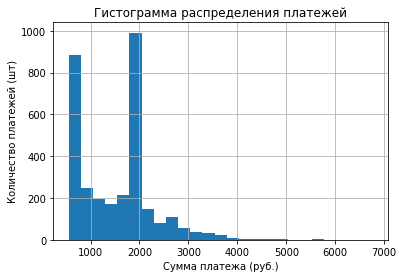

count   3216.00
mean    1528.90
std      798.22
min      550.00
25%      750.00
50%     1653.50
75%     1950.00
max     6770.00
Name: final_pay, dtype: float64

In [45]:
ax = data['final_pay'].hist(bins=25)
ax.set_title('Гистограмма распределения платежей')
ax.set_xlabel('Сумма платежа (руб.)')
ax.set_ylabel('Количество платежей (шт)')
plt.show()
data['final_pay'].describe()

На графике видны большое количество оплат а размере ежемесечной стоимости тарифа.

### Вывод

**Во время предобработки данных:**
1. Првел столбцы с датой в каждом файле к типу datetime64 и выделил месяц
2. Удалить столбец Unnamed: 0 в internet
3. Посчитал ежемесячное использование услуг тарифа согласно условиям "Мегалайн"
4. Собрана общая таблица с ежемесечной информацией по каждому пользователю
5. Посичитана ежемесечная выручка по каждому пользователю.

## Анализ данных

По предобработанным данным проведем анализ:
1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.
2. Посчитаю среднее количество, дисперсию и стандартное отклонение вышеперечисленных данных.
3. Визуализирую и опишу распределение.

Для дальнейшего исследования отсортирую данные по тарифам и посмотрю распределения значений в используемых услугах.

In [46]:
data_ultra = data[data['tariff'] == 'ultra']
data_smart = data[data['tariff'] == 'smart']


**Посчитаю как распределяются данные использования услуг у пользователей разных тарифов**

In [47]:
data_smart[['duration_ceil', 'messages_count', 'gb_used']].describe()

,duration_ceil,messages_count,gb_used
count,2223.00,1922.00,2228.00
mean,419.06,38.72,16.34
std,189.33,26.79,5.74
min,0.00,1.00,0.00
25%,285.00,17.00,13.00
50%,423.00,34.00,17.00
75%,545.50,55.00,20.00
max,1435.00,143.00,38.00


In [48]:
data_ultra[['duration_ceil', 'messages_count', 'gb_used']].describe()

,duration_ceil,messages_count,gb_used
count,951.00,795.00,975.00
mean,545.45,61.16,19.69
std,306.93,45.93,9.70
min,0.00,1.00,0.00
25%,310.00,24.00,12.00
50%,528.00,51.00,19.00
75%,756.50,87.50,27.00
max,1673.00,224.00,49.00


1. Пользователи тарифа smart давольно часто используют минуты сверх тарифа, это касается и сообщений. Услуги интернета пользователи смарта более чем в 50% случаев оплачивают сверх тарифа.
2. Пользователи тарифа ultra ни разу за период выборки не использовали минут и сообщений сверх тарифа. Более 75% пользователей укладываются в предоставленный тарифом интернет трафик.

**Посчитаю среднее, дисперсию и стандартное отклонение данных.**

In [49]:
data.pivot_table(index='tariff', values = ['duration_ceil', 'messages_count', 'gb_used'],
                 aggfunc=['mean', 'std','var']).reset_index()

tariff          mean                                  std          \
         duration_ceil gb_used messages_count duration_ceil gb_used   
0  smart        419.06   16.34          38.72        189.33    5.74   
1  ultra        545.45   19.69          61.16        306.93    9.70   

                           var                         
  messages_count duration_ceil gb_used messages_count  
0          26.79      35844.19   32.92         717.59  
1          45.93      94203.42   94.15        2109.66

**Вывод**

Средние значения данных по использованию услуг пользователями разных тарифов имеют небольшие расхождения, но значения дисперсии и среднего отклонения данных сильно различаются. У пользователей тарифа ultra  дисперися в разы больше, это связано с более широким диапазоном данных и меньшем количеством пользователей.

**Распределение данных**

Построю графики распределения занчений использования услуг пользователями.

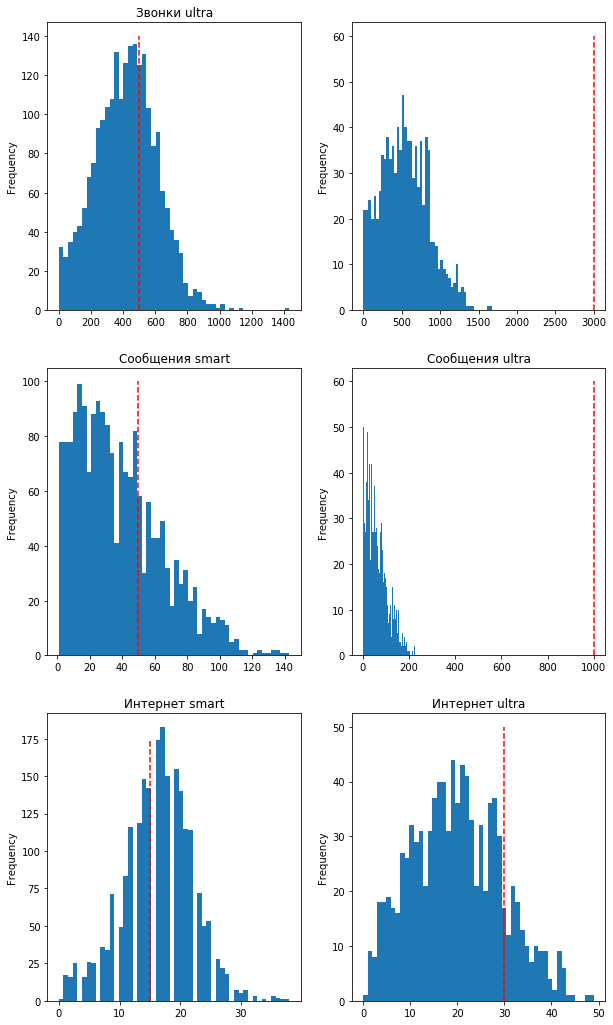

In [50]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,18))

data_smart['duration_ceil'].plot(kind='hist', bins=50, ax=ax[0,0])
ax[0,0].vlines(500, 0, 140, color = 'r', linestyle='--')
ax[0,0].set(title = 'Звонки smart')

data_ultra['duration_ceil'].plot(kind='hist', bins=50, ax=ax[0,1])
ax[0,1].vlines(3000, 0, 60, color = 'r', linestyle='--')
ax[0,0].set(title = 'Звонки ultra')

data_smart['messages_count'].plot(kind='hist', bins=50, ax=ax[1,0])
ax[1,0].vlines(50, 0, 100, color = 'r', linestyle='--')
ax[1,0].set(title = 'Сообщения smart')

data_ultra['messages_count'].plot(kind='hist', bins=50, ax=ax[1,1])
ax[1,1].vlines(1000, 0, 60, color = 'r', linestyle='--')
ax[1,1].set(title = 'Сообщения ultra')

data_smart['gb_used'].plot(kind='hist', bins=50, ax=ax[2,0])
ax[2,0].vlines(15, 0, 175, color = 'r', linestyle='--')
ax[2,0].set(title = 'Интернет smart')

data_ultra['gb_used'].plot(kind='hist', bins=50, ax=ax[2,1])
ax[2,1].vlines(30, 0, 50, color = 'r', linestyle='--')
ax[2,1].set(title = 'Интернет ultra')

plt.show()

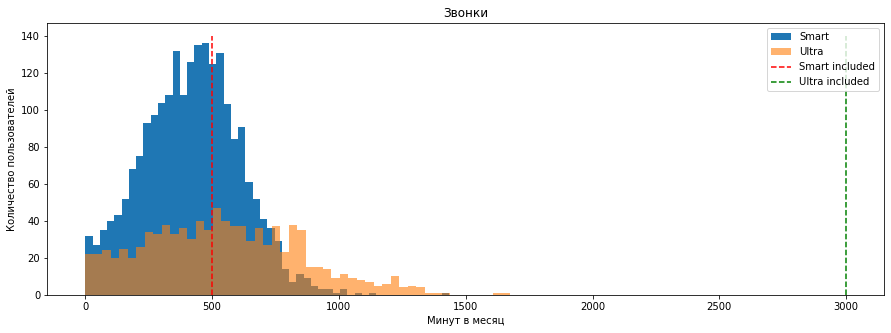

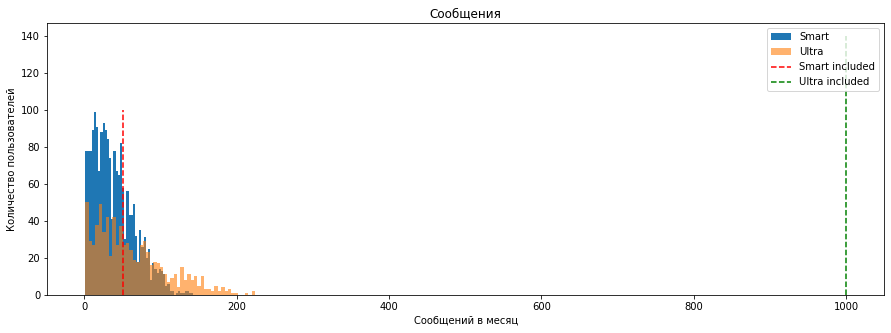

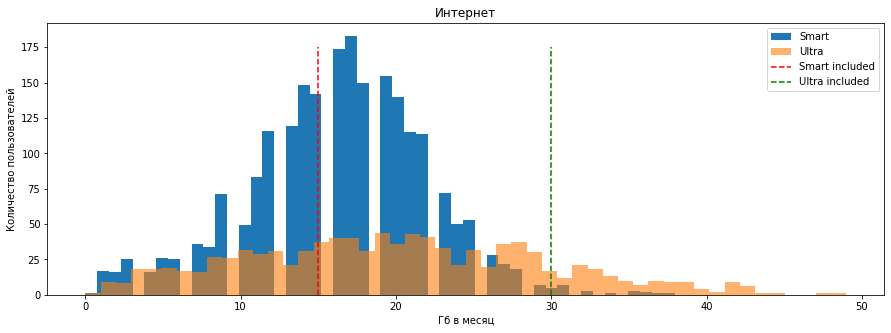

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data_smart['duration_ceil'].plot(kind='hist', bins=50, ax=ax)
data_ultra['duration_ceil'].plot(kind='hist', bins=50, alpha=0.6, ax=ax)
ax.vlines(500, 0, 140, color = 'r', linestyle='--')
ax.vlines(3000, 0, 140, color = 'g', linestyle='--')
ax.set_title('Звонки')
ax.set_xlabel('Минут в месяц')
ax.set_ylabel('Количество пользователей')
ax.legend(['Smart', 'Ultra', 'Smart included', 'Ultra included'])
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data_smart['messages_count'].plot(kind='hist', bins=50, ax=ax)
data_ultra['messages_count'].plot(kind='hist', bins=50, alpha=0.6, ax=ax)
ax.vlines(50, 0, 100, color = 'r', linestyle='--')
ax.vlines(1000, 0, 140, color = 'g', linestyle='--')
ax.set_title('Сообщения')
ax.set_xlabel('Сообщений в месяц')
ax.set_ylabel('Количество пользователей')
ax.legend(['Smart', 'Ultra', 'Smart included', 'Ultra included'])
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data_smart['gb_used'].plot(kind='hist', bins=50, ax=ax)
data_ultra['gb_used'].plot(kind='hist', bins=50, alpha=0.6, ax=ax)
ax.vlines(15, 0, 175, color = 'r', linestyle='--')
ax.vlines(30, 0, 175, color = 'g', linestyle='--')
ax.set_title('Интернет')
ax.set_xlabel('Гб в месяц')
ax.set_ylabel('Количество пользователей')
ax.legend(['Smart', 'Ultra', 'Smart included', 'Ultra included'])
plt.show()


**Посмотрев на гистаграммы:**
1. Гистограммы использования звонков и интернета на обоих тарифах имеет похожее на нормальное распределение без явно замеченного скоса, средние значения имеют небольшое расхождения с медианными.
2. Гистораммы использования сообщений на обоих тарифах имеют явно выраженный скос вправо, что подтверждается более значимым расхождением значений среднего и медианной, среднее больше.
3. Красной линией отмечен входящий в стоимость тарифа объем услуг. На гистограммах использования минут и сообщений видно, что пользователи тарифа ultra используют данные услуги гараздо меньше чем расчитано в тарифе.

### Вывод

1. Пользователи тарифа smart давольно часто используют минуты сверх тарифа, это касается и сообщений. Услуги интернета пользователи смарта более чем в 50% случаев оплачивают сверх тариф, это хорошо видно на гистаграммах
2. Пользователи тарифа ultra ни разу за период выборки не использовали минут и сообщений сверх тарифа. Более 75% пользователей укладываются в предоставленный тарифом интернет трафик, это хорошо видно на гистаграммах
3. Средние значения данных по использованию услуг пользователями разных тарифов имеют небольшие расхождения, но значения дисперсии и среднего отклонения данных сильно различаются. У пользователей тарифа ultra  дисперися в разы больше, это связано с более широким диапазоном данных и меньшем количеством пользователей.
4. Гистограммы использования звонков и интернета на обоих тарифах имеет похожее на нормальное распределение без явно замеченного скоса, средние значения имеют небольшое расхождения с медианными.
5. Гистораммы использования сообщений на обоих тарифах имеют явно выраженный скос вправо, что подтверждается более значимым расхождением значений среднего и медианной, среднее больше.

## Формулировка и проверка гипотез

1. Cредняя выручка пользователей тарифов Ultra и Smart различаются
2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Проверю гипотезу: "Cредняя выручка пользователей тарифов Ultra и Smart различаются"**

Нулевая гипотеза: "Cредняя выручка пользователей тарифов Ultra и Smart не различаются"
Данная гипотеза двухсторонняя и относятся к выборкам из разных генеральных совокупностей: клиенты smart и клиенты ultra.

Проверку двухсторонней гипотезы будем осуществлять методом t-test. Так как выборки разного размера и пользователи разных тарифов по разному используют услуги, будем считать что дисперсии наших совокупностей не равны. Критический уровень статистической значимости установим 0.05

In [52]:
alpha = .05
results = st.ttest_ind(data_ultra['final_pay'],
                     data_smart['final_pay'],
                     equal_var = False)
print('p-значение: ', '{:.2}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.9e-250
Отвергаем нулевую гипотезу


In [53]:
if data_ultra['final_pay'].mean() < data_smart['final_pay'].mean():
    print('Выручка пользователей тарифа Smart больше выручки пользователей тарифа Ultra')
else:
    print('Выручка пользователей тарифа Ultra больше выручки пользователей тарифа Smart')

Выручка пользователей тарифа Ultra больше выручки пользователей тарифа Smart


**Вывод:**

Выручка пользователей тарифа Ultra больше выручки пользователей тарифа Smart

По результатам проверки гипотеза "Cредняя выручка пользователей тарифов Ultra и Smart не различаются", была отвергнута в связи с слишком низкой вероятностью (стремится к 0) получить такое различие если бы нулевая гипотеза была верна. **Cредняя выручка пользователей тарифов Ultra и Smart различается.**

**Проверю гипотезу: "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"**

Нулевая гипотеза: "Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов".

Проверку двухсторонней гипотезы будем осуществлять методом t-test. Выборки по регионам относятся к одной генеральной совокупности. Критический уровень статистической значимости установим 0.05

Получим две выборки с одинаковым количеством данных по Москве и другим регионам. Посмотрю какое количество данных по пользователям из Москвы и из других регионов.

In [54]:
len(data.query('city == "Москва"'))

611

In [55]:
len(data.query('city != "Москва"'))

2605

Чем больше выборка, тем ближе значения к нормальному распределению, поэтому возьмем выборку пользователей из регионов столько же, сколько у нас пользователей из Москвы

In [56]:
mos = data.query('city == "Москва"')
other = data.query('city != "Москва"').sample(n=len(mos))
len(other)

611

Проверю гипотезу

In [57]:
alpha = .05
results = st.ttest_rel(mos['final_pay'],
                       other['final_pay'])
print('p-значение: ', '{:.2}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.31
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

По результатам проверки нельзя отвергнуть нулевую гипотезу "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов", в связи вероятностью получить данный результат превышающей критический уровень статистической значимости. **Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов**

### Вывод
1. Выручка пользователей тарифа Ultra больше выручки пользователей тарифа Smart. По результатам проверки гипотеза "Cредняя выручка пользователей тарифов Ultra и Smart не различаются", была отвергнута в связи с слишком низкой вероятностью (стремится к 0) получить такое различие если бы нулевая гипотеза была верна. **Cредняя выручка пользователей тарифов Ultra и Smart различается.**
2. По результатам проверки нельзя отвергнуть нулевую гипотезу "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов", в связи вероятностью получить данный результат превышающей критический уровень статистической значимости.**Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.**

## Вывод

**В ходе исследования:**

Я ознакомился с данными и выполнил их предобработку:
* Мне были предоставлены данные 500 пользователей и информацию по испоьзованию ими услуг тарифа. Изучив данные были обнаружены ошибки в типах данных, лишние столбцы.
* Исправил типы даных на подходящий, удалил ошибочные столбцы, проверил наличие неявных дубликатов.
* Посчитал какое количество услуг пользователи используют ежемесячно.
* Склеил общую таблицу с информацией о пользователях, услугах и тарифах.
* Посчитана ежемесечная выручка по каждому пользователю.
* Обнаружел двух пользователей которые подключили тариф и отключились в этот же месяц, не пользуясь услугами, при этом повторного появления данных пользователй в предоставленной выборке небыло.

Провел анализ данных:
* Было выявлено что большинству пользователей не хватает входящих в тариф smart услуг и они докупают дополнительные минуты, сообщения или гигабайты трафика. Интернет докупают в более чем 50% случаев.
* Пользователи ultra наоборот не используют предоставленные тарифам минуты и сообщения, но интеренет расходуют больше, выходя за рамки тарифа менее чем в 25% случаев. Кажется что данных пользователей в тарифе ultra больше привлекает как раз наличие большого объема интернет трафика.
* Построил гистаграммы для визуализации вышеописанной информации, добавив на гистаграмы линии, показывающие границу, входящую в тариф.

Проверил гипотезы:
* Нулевая гипотеза о том, что средняя выручка пользователей тарифов Ultra и Smart не различаются, была отвергнута. Выручка пользователей тарифа Ultra больше выручки пользователей тарифа Smart, несмотря на то, что много пользователей тарифа smart не укладываются в тариф и докупают дополнительные услуги. 
* Альтернативная гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов была отвергнута, достаточно высокая вероятность получить такие значения при верной нулевой гипотезе.
